<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_05/lab_05.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05



## Problema 01
<img src="https://storage.googleapis.com/kaggle-datasets-images/19/19/default-backgrounds/dataset-card.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [19]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [20]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_05/data/iris_contaminados.csv")
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *float*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [21]:
print(df)
df['species'].loc[df['species']=='VIRGINICA'] = 'virginica'
df['species'].loc[df['species']==' virginica'] = 'virginica'
df['species'].loc[df['species']=='virginica '] = 'virginica'
df['species'].loc[df['species']=='SETOSA'] = 'setosa'
df['species'].loc[df['species']=='Setosa'] = 'setosa'
df['species'].loc[df['species']=='Versicolor'] = 'versicolor'
df['species'].loc[df['species']=='VERSICOLOR'] = 'versicolor'
df.loc[df['species'].isnull(),'species'] = 'default'
print(df)

     sepalLength  sepalWidth  petalLength  petalWidth     species
0            4.4         3.2          1.3         3.0      setosa
1            7.2         3.6          6.1         2.5   virginica
2            6.3         3.3          6.0         2.5   VIRGINICA
3            6.7         3.3          5.7         2.5   virginica
4            6.3         3.4          5.6         2.4   virginica
..           ...         ...          ...         ...         ...
145          5.3         3.0          1.1         0.1      Setosa
146          4.8         3.0          1.4         0.1      Setosa
147          4.9         3.1          1.5         0.1      Setosa
148          4.9         3.6          1.4         0.1      setosa
149          5.2         4.1          1.5         0.1      setosa

[150 rows x 5 columns]
     sepalLength  sepalWidth  petalLength  petalWidth    species
0            4.4         3.2          1.3         3.0     setosa
1            7.2         3.6          6.1         2.5 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

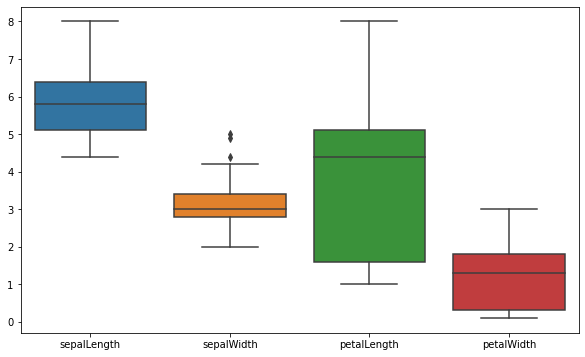

In [22]:
df.loc[df['sepalLength']==0] = '0'
df.loc[df['sepalWidth']==0] = '0'
df.loc[df['petalLength']==0] = '0'
df.loc[df['petalWidth']==0] = '0'
dff = df.drop(['species'],axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=dff)
plt.show()


3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [24]:
df.insert(0,'label',0) # comentado por que despues de hacerlo una vez me decia error por que ya existe

df['label'].loc[(df['sepalLength']>= 7) | (df['sepalLength'] <= 4)] ='sepalLength'
df['label'].loc[(df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)] ='sepalWidth'
df['label'].loc[(df['petalLength']>= 7) | (df['petalLength'] <= 1)] ='petalLength'
df['label'].loc[(df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1)] ='petalWidth'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2))] ='sepalLength, sepalWidth'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['petalLength']>= 7) | (df['petalLength'] <= 1))] ='sepalLength, petalLength'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1)) ] ='sepalLength, petalWidth'
df['label'].loc[((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)) & ((df['petalLength']>= 7) | (df['petalLength'] <= 1))] ='sepalWidth, petalLength'
df['label'].loc[((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)) & ((df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1)) ] ='sepalWidth, petalWidth'
df['label'].loc[((df['petalLength']>= 7) | (df['petalLength'] <= 1)) & ((df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1)) ] ='petalLength, petalWidth'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)) & ((df['petalLength']>= 7) | (df['petalLength'] <= 1))] = 'sepalWidth, petalLength, petalWidth'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['petalLength']>= 7) | (df['petalLength'] <= 1)) & ((df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1)) ] = 'sepalLength, petalLength, petalWidth'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)) & ((df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1)) ] = 'sepalLength, sepalWidth, petalWidth'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)) & ((df['petalLength']>= 7) | (df['petalLength'] <= 1))] = 'sepalLength, sepalWidth, petalLength'
df['label'].loc[((df['sepalLength']>= 7) | (df['sepalLength'] <= 4)) & ((df['sepalWidth']>= 4.5) | (df['sepalWidth'] <= 2)) & ((df['petalLength']>= 7) | (df['petalLength'] <= 1)) & ((df['petalWidth']>= 2.5) | (df['petalWidth'] <= 0.1))] = 'sepalLength, sepalWidth, petalLength, petalWidth'
print(df)

                       label sepalLength sepalWidth petalLength petalWidth  \
0                 petalWidth         4.4        3.2         1.3        3.0   
1    sepalLength, petalWidth         7.2        3.6         6.1        2.5   
2                 petalWidth         6.3        3.3         6.0        2.5   
3                 petalWidth         6.7        3.3         5.7        2.5   
4                          0         6.3        3.4         5.6        2.4   
..                       ...         ...        ...         ...        ...   
145               petalWidth         5.3        3.0         1.1        0.1   
146               petalWidth         4.8        3.0         1.4        0.1   
147               petalWidth         4.9        3.1         1.5        0.1   
148               petalWidth         4.9        3.6         1.4        0.1   
149               petalWidth         5.2        4.1         1.5        0.1   

       species  
0       setosa  
1    virginica  
2    virgini

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

['petalWidth' 'sepalLength, petalWidth' 0 'sepalLength'
 'petalLength, petalWidth' 'sepalLength, sepalWidth' 'sepalWidth'
 'petalLength']


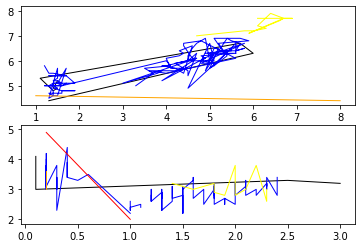

In [33]:
print(df['label'].unique())
df1 = df.drop(['sepalWidth','petalWidth','species'], axis=1)
df2 = df.drop(['sepalLength','petalLength','species'], axis=1)
df11 = df1[df.label == 'petalWidth']
df12 = df1[df.label == 'sepalLength, petalWidth']
df13 = df1[df.label == 0]
df14 = df1[df.label == 'sepalLength']
df15 = df1[df.label == 'petalLength, petalWidth']
df16 = df1[df.label == 'sepalLength, sepalWidth']
df17 = df1[df.label == 'sepalWidth']
df18 = df1[df.label == 'petalLength']

fig, ax = plt.subplots(2)
ax[0].plot(df11['petalLength'],df11['sepalLength'],label='petalWidth',color="black",linewidth=1 )
ax[0].plot(df12['petalLength'],df12['sepalLength'],label='sepalLength, petalWidth',color="green",linewidth=1 )
ax[0].plot(df13['petalLength'],df13['sepalLength'],label=0,color="blue",linewidth=1 )
ax[0].plot(df14['petalLength'],df14['sepalLength'],label='sepalLength',color="yellow",linewidth=1 )
ax[0].plot(df15['petalLength'],df15['sepalLength'],label='petalLength, petalWidth',color="pink",linewidth=1 )
ax[0].plot(df16['petalLength'],df16['sepalLength'],label='sepalLength, sepalWidth',color="purple",linewidth=1 )
ax[0].plot(df17['petalLength'],df17['sepalLength'],label='sepalWidth',color="red",linewidth=1 )
ax[0].plot(df18['petalLength'],df18['sepalLength'],label='petalLength',color="orange",linewidth=1 )

df21 = df2[df.label == 'petalWidth']
df22 = df2[df.label == 'sepalLength, petalWidth']
df23 = df2[df.label == 0]
df24 = df2[df.label == 'sepalLength']
df25 = df2[df.label == 'petalLength, petalWidth']
df26 = df2[df.label == 'sepalLength, sepalWidth']
df27 = df2[df.label == 'sepalWidth']
df28 = df2[df.label == 'petalLength']

ax[1].plot(df21['petalWidth'],df21['sepalWidth'],label='petalWidth',color="black",linewidth=1 )
ax[1].plot(df22['petalWidth'],df22['sepalWidth'],label='sepalLength, petalWidth',color="green",linewidth=1 )
ax[1].plot(df23['petalWidth'],df23['sepalWidth'],label=0,color="blue",linewidth=1 )
ax[1].plot(df24['petalWidth'],df24['sepalWidth'],label='sepalLength',color="yellow",linewidth=1 )
ax[1].plot(df25['petalWidth'],df25['sepalWidth'],label='petalLength, petalWidth',color="pink",linewidth=1 )
ax[1].plot(df26['petalWidth'],df26['sepalWidth'],label='sepalLength, sepalWidth',color="purple",linewidth=1 )
ax[1].plot(df27['petalWidth'],df27['sepalWidth'],label='sepalWidth',color="red",linewidth=1 )
ax[1].plot(df28['petalWidth'],df28['sepalWidth'],label='petalLength',color="orange",linewidth=1 )

plt.show()

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


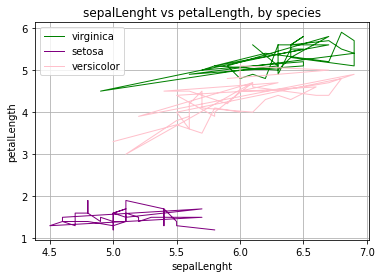

In [14]:
dfs = df.drop(['sepalWidth','petalWidth'],axis = 1)
dfs = dfs[df.label == 0]
dfs = dfs.drop(['label'],axis=1)
dfs1 = dfs[df.species == 'virginica']
dfs2 = dfs[df.species == 'setosa']
dfs3 = dfs[df.species == 'versicolor']
plt.plot(dfs1.sepalLength,dfs1.petalLength,label = 'virginica',color='green',linewidth=1)
plt.plot(dfs2.sepalLength,dfs2.petalLength,label = 'setosa',color='purple',linewidth=1)
plt.plot(dfs3.sepalLength,dfs3.petalLength,label = 'versicolor',color='pink',linewidth=1)
plt.legend() # agregar etiquetado
plt.title("sepalLenght vs petalLength, by species") # agregar titulo
plt.xlabel('sepalLenght') # nombre eje x
plt.ylabel('petalLength') # nombre eje y
plt.grid() # agregar grillado
plt.show() # mostrar grafico